# **ECS7020P Mini-Project Submission: Basic Component**

# 1 Author
Student Name: Malaika Phoplankar

Student ID: 230856820

# 2 Problem formulation

**Describe the machine learning problem that you want to solve and explain what's interesting about it.**

In our MLEnd Yummy Dataset, there are 3,250 enriched images of various meals that have been eaten and rated on multiple factors such as enjoyment as well as healthiness. Traditionally, out of the two carbs rice is considered healthier than chips. We could use this, classifying each photo based on whether they contain rice or chips, as an indication of how healthy the dish in the photo may be.

I would like to build a machine learning pipeline that takes a photo of a dish that contains either rice or chips as input and outputs a prediction of which of the two the photo contains.


# 3 Machine Learning pipeline
**1) Input: a smaller subset of the MLEnd Yummy Dataset where each image either contains rice or chips**

**2) Creation of training and validation sets**

The dataset will be separated into either our training or validation dataset. How the dataset will be separated has been pre-determined and will be split according to the "Benchmark_A" column.

**3) Transformation: Resizing Images**

Images from both training and validation sets transformed to a more uniform size 200x200 pixels.

**4) Feature Extraction**

Extraction of the following features will be carried out: yellow component; two grayscale features; white component; edge feature. This transformation will reduce the dimensionality of the data.

**5) Model Training**

Application of LinearSVC model to extracted data.

**6) Model Evaluation**

The model is then assessed by using validation accuracy. The performance of the model will then be illustrated through the plotting of a confusion matrix, particularly the per-class performances.

**7) Output: Prediction Accuracy (in percentages)**


# 4 Transformation stage
**Resizing the images**\
This transformation was carried out as the images were of varying sizes since they are coming from various device types.
In this transformation, the images are all resized with the addition of a black bar if necessary so that they are all 200x200 pixels (square-shaped). This transformation is carried out each of the datasets separated for training and validation.

**Feature Extraction**\
The resized images are then input for our feature extraction step. We will be extracting the following features from the images: amount of yellow in the image; amount of white in the image; two Gray Level Co-occurrence Matrix (GMLC) features, dissimilarity and correlation, which both give us information about image texture and the spatial relationships between pixels; edge features, which uses Canny Edge Detection and this works by first reducing noise in the image, then working out the edge gradient and angle (which represents direction of the gradient) for individual pixels then each edge is compared to threshold values for deliberation on whether they are considered an actual edge.  

These features are extracted to reduce dimensionality of the data.

# 5 Modelling
#### Considered models

**Linear Support Vector Classification**\
LinearSVC works well in high-dimensional spaces but may not perform well if the classes are not linearly separable.

**Random Forest Classification**\
This model handles non-linear relationships well but is difficult to interpret.

**Convolutional Neural Network (CNN)**\
CNNs are well-suited for image classification tasks and works well with large datasets though it does require a large amount of computational power.

#### Final model decision
For this ML problem, we will be using a linearSVC model since we are dealing with many extracted features.

# 6 Methodology
The LinearSVC model works by finding a hyperplane that distinguishes and separates the different classes in the feature space, with the aim to find the boundary with the most separation between the itself and the closest points from each class. The data points near the hyperplane are referred to as support vectors and these are the points that aid the algorithm in finding the optimal hyperplane. The 'C' value is parameter in LinearSVC models that regulates the balance between minimising training error and testing error. The risk of smaller C values is that the model may misclassify some training points because the boundary is simpler whereas the risk for a larger C is that is more heavily penalises misclassifications. The C value will be determined by carrying out a grid search to determine what C value to use for our model.

After training and validating the model, its performance will be assessed by the use of validation accuracy and confusion matrix. The confusion matrix will illustrate per-class performance to give us a better idea of how accurately the model is predicting each class.

# 7 Dataset

For this ML pipeline, we will be using a smaller subset of the dataset which contains 99 images of dishes containing either rice or chips. The enriched images are downloaded along with the complimentary csv file containing the following attributes: name of the dish; whether it is homemade or not, and if it was not then the restaurant or establishment from which it was purchased from is specified;	cuisine; list of ingredients;	diet;	rating of how healthy the dish is; overall enjoyment of the dish;	specification of whether it contains rice or chips.


## Environment set up

In [1]:
pip install mlend --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy_small, yummy_small_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
baseDir = download_yummy_small(save_to = '/content/drive/MyDrive/Data/MLEnd')
baseDir

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|99\99|00099.jpg
Done!


'/content/drive/MyDrive/Data/MLEnd/yummy'

In [4]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_small.csv').set_index('filename')
MLENDYD_df

Dish_name  \
filename                                                       
00001.jpg                                      steak_&_fries   
00002.jpg                                   beef_burger_meal   
00003.jpg                chicken_burger_with_fries_and_wings   
00004.jpg                               fried_rice_with_curd   
00005.jpg                                     fish_and_chips   
...                                                      ...   
00095.jpg  breaded_chicken_with_katsu_curry_sauce_rice_&_...   
00096.jpg                            chicken_wrap_with_fries   
00097.jpg                                     butter_chicken   
00098.jpg                                     fish_and_chips   
00099.jpg                                            burghul   

              Home_restaurant     Cuisine  \
filename                                    
00001.jpg          resturaunt    american   
00002.jpg          restaurant    american   
00003.jpg          restaurant    american   
00004.jpg                home      indian   
00005.jpg             tcr_bar     british   
...                       ...         ...   
00095.jpg           the_curve    japanese   
00096.jpg  roosters_piri_piri  portuguese   
00097.jpg          restaurant      indian   
00098.jpg          restaurant     british   
00099.jpg                home     turkish   

                                                 Ingredients        Diet  \
filename                                                                   
00001.jpg                            steak,fries,mixed_salad     non-veg   
00002.jpg                        chips,burger,chicken_nugget     non-veg   
00003.jpg  fried_chicken_breast,lettuce,ketchup,sesame_se...     non-veg   
00004.jpg            rice,onion,potato,tomato,olive_oil,curd  vegetarian   
00005.jpg              cod,beer,flour,tartare_sauce,peas,oil  vegetarian   
...                                                      ...         ...   
00095.jpg              chicken,curry,rice,greens,bell_pepper     non-veg   
00096.jpg  tortilla_wrap,chicken,olive_oil,piri_piri_sauc...     non-veg   
00097.jpg  garlic,tomato,onion,white_rice,naan_bread,cash...     non-veg   
00098.jpg                         breaded_cod,fried_potatoes     non-veg   
00099.jpg                           butter,olive_oil,burghul  vegetarian   

          Healthiness_rating How_much_did_you_like_it Rice_Chips Benchmark_A  
filename                                                                      
00001.jpg            neutral            strongly_like      chips        Test  
00002.jpg          unhealthy                     like      chips       Train  
00003.jpg          unhealthy                     like      chips       Train  
00004.jpg            neutral                     like       rice       Train  
00005.jpg            neutral            strongly_like      chips        Test  
...                      ...                      ...        ...         ...  
00095.jpg            healthy            strongly_like       rice       Train  
00096.jpg            healthy            strongly_like      chips       Train  
00097.jpg            neutral                     like       rice       Train  
00098.jpg            healthy            strongly_like      chips       Train  
00099.jpg       very_healthy                  neutral       rice        Test  

[99 rows x 9 columns]

In [5]:
TrainSet, TestSet, Map = yummy_small_load(datadir_main=baseDir,train_test_split='Benchmark_A')

Total 99 found in /content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/


In [6]:
TrainSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [8]:
TestSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [9]:
Map

{'Rice_Chips': {'chips': 0, 'rice': 1}}

In [10]:
TrainSet['Y']

array(['chips', 'chips', 'rice', 'rice', 'rice', 'chips', 'rice', 'chips',
       'rice', 'chips', 'chips', 'rice', 'chips', 'rice', 'rice', 'chips',
       'rice', 'rice', 'chips', 'rice', 'chips', 'rice', 'rice', 'chips',
       'chips', 'chips', 'rice', 'rice', 'chips', 'rice', 'rice', 'rice',
       'rice', 'rice', 'chips', 'chips', 'chips', 'rice', 'chips', 'rice',
       'rice', 'chips', 'chips', 'rice', 'chips', 'chips', 'chips',
       'chips', 'chips', 'chips', 'chips', 'rice', 'chips', 'rice',
       'chips', 'chips', 'rice', 'rice', 'chips', 'chips', 'rice', 'rice',
       'rice', 'rice', 'rice', 'chips', 'rice', 'chips', 'rice', 'chips'],
      dtype=object)

In [11]:
TrainSet['Y_encoded']

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0])

In [12]:
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

Rice


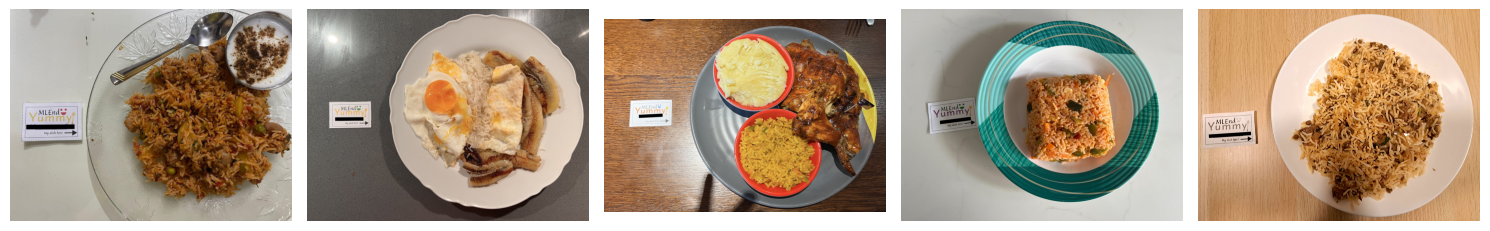

Chips


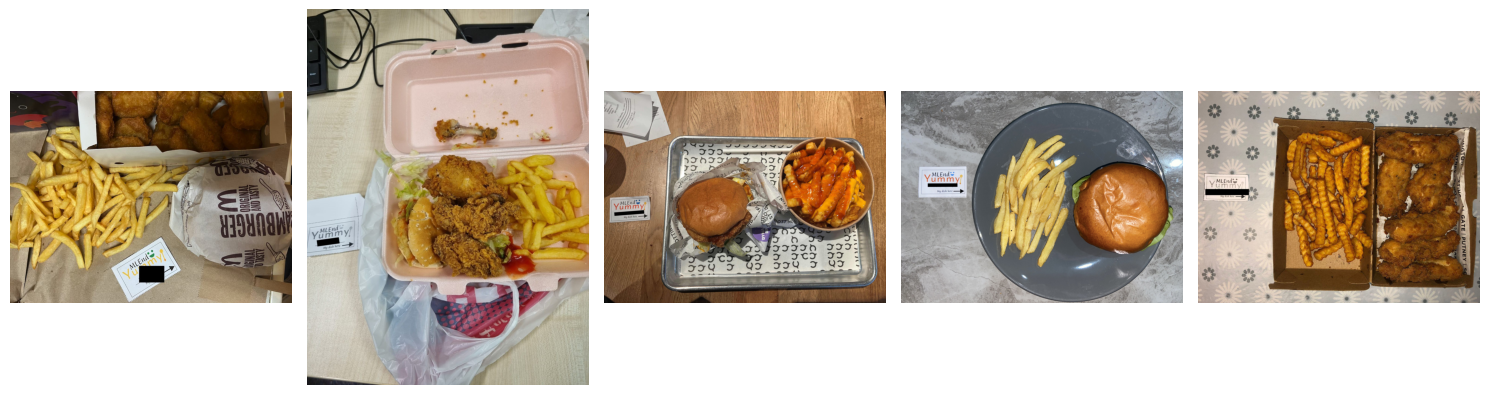

In [13]:
Chips_Img = np.array(X_train_paths)[Y_train==0]
Rice_Img = np.array(X_train_paths)[Y_train==1]

print('Rice')
plt.figure(figsize=(15,5))
for k,file in enumerate(Rice_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

print('Chips')
plt.figure(figsize=(15,5))
for k,file in enumerate(Chips_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

As you can see from the plotted images above, the images are of various sizes and need to be made more uniform. The code below resizes the images.

In [14]:
def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

In [15]:
X_train_with_filename = []
for k,file in enumerate(X_train_paths):
  sp.utils.ProgBar_JL(k,len(X_train_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_train_with_filename.append((file, I))

X_test_with_filename = []
for k,file in enumerate(X_test_paths):
  sp.utils.ProgBar_JL(k,len(X_test_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_test_with_filename.append((file, I))

X_train_with_filename = np.array(X_train_with_filename, dtype=object)
X_test_with_filename = np.array(X_test_with_filename, dtype=object)
X_train_with_filename.shape, X_test_with_filename.shape

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|29\29|
Done!


((70, 2), (29, 2))

### Feature Extraction

The following coding cell details functions used to extract the features discussed previously (see Transformation Stage).

In [21]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import feature

def get_yellow_component(I,t1=29, t2=34):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

def GMLC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2

def get_white_component(I, t=200):
    I_8bit = (I*255).astype(np.uint8)
    I_gray = cv2.cvtColor(I_8bit, cv2.COLOR_RGB2GRAY)
    _, binary_mask = cv2.threshold(I_gray, t, 255, cv2.THRESH_BINARY)
    Wpx = np.sum(binary_mask==255)
    return Wpx

def edge_features(I):
    Ig = rgb2gray(I)
    edges = feature.canny(Ig)
    edge_density = np.sum(edges) / (Ig.shape[0] * Ig.shape[1])
    return edge_density

def showConfMat(CM, labels = ['Chips','Rice']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

I had attempted to create a function to identify rectangles within the images, with most chips or fries taking on this shape. I found, however, that it decreases the accuracy of my model so I omitted its implementation in the final pipeline.

In [22]:
def find_rectangles(I):
    im = cv2.imread(I)
    imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 150, 200, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    total_area = 0
    for i in range(len(contours)):
        area = cv2.contourArea(contours[i])
        if 50000 < area < 100000:
            total_area += area
            cv2.drawContours(im, contours[i], -1, (255, 0, 0), 3)

    return total_area

In the code below, we are populating two lists with the 5 features, one for training and one for validation.

In [23]:
X_train_f = []
for k, I in enumerate(X_train_with_filename):
  f1 = get_white_component(I[1])
  f2 = get_yellow_component(I[1])
  f3, f4 = GMLC_features(I[1])
  f5 = edge_features(I[1])
  X_train_f.append([f1,f2,f3,f4,f5])

X_test_f = []
for k, I in enumerate(X_test_with_filename):
  f1 = get_white_component(I[1])
  f2 = get_yellow_component(I[1])
  f3, f4 = GMLC_features(I[1])
  f5 = edge_features(I[1])
  X_test_f.append([f1,f2,f3,f4,f5])

Once X_train_f and X_test_f have formatted as numpy arrays, we can verify their shapes:

In [24]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((70, 5), (29, 5))

### Normalisation

Following feature extraction, the dimensionality of the data has been reduced and we are now only dealing with 6 attributes for each image as opposed to the 120,000 data points (200x200x3) we had before.

We can now look normalising the data so that the points fall within a similar range.

In [25]:
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

# 8 Results
As explained in the beginning, a linear model is being applied for this problem.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import LinearSVC

model = LinearSVC(C=0.1)
model.fit(X_train_fn, Y_train)

LinearSVC(C=0.1)

In [27]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.6571428571428571
Test  Accuracy:	 0.7241379310344828


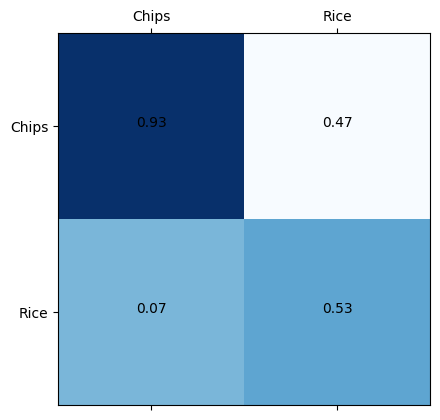

In [28]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

# 9 Conclusions
The linearSVC model used in this pipeline has performed very well at accurately classifying chips but less so at rice, which is not much better than flipping a coin. The test accuracy is fairly high as well at 0.72.

To improve this pipeline, it woud be better to use a dataset with a more even distribution of data between the classes to train the model. We could also extract different types of features that would help pick out characteristics specific to rice.

Another sugestion for improvement is that we try using a different type of model such as logistic regression.